In [7]:
from sidmpy.Solver.util import compute_rho_sigmav_grid
from sidmpy.CrossSections.tchannel import TChannel
import numpy as np
import matplotlib.pyplot as plt

The model used to compute the central density of the SIDM profile sometimes admits two solutions, one with a core radius that is the same order as the scale radius, and a second solution with a core that is much smaller. To show this, we'll compute the goodness of fit of many combinations of central densities and velocity dispersions.

In [20]:
N = 100
log_rho = np.linspace(6.7, 14., N)
vdis = np.linspace(3, 15, N)
log_rho_values, vdis_values = np.meshgrid(log_rho, vdis)
shape0 = log_rho_values.shape
log_rho_values = log_rho_values.ravel()
vdis_values = vdis_values.ravel()
rhos, rs, halo_age = 5 * 10 ** 7, 0.5, 10.
kwargs_cross = {'norm': 10., 'v_ref': 50.}
cross_section_class = TChannel(**kwargs_cross)
rmin_profile = 1e-3
rmax_profile = 10.

grid = compute_rho_sigmav_grid(log_rho_values, vdis_values, rhos, rs, cross_section_class, halo_age, 
                               rmin_profile, rmax_profile, use_nfw_velocity_dispersion=False).reshape(shape0)
loggrid = np.log10(grid)

### Plot results

Below, the x-axis shows log10(rho_central) and the y-axis shows the velocity dispersion in km/sec

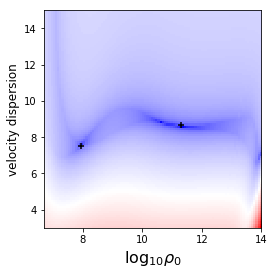

In [24]:
worst = np.max(loggrid)
best = np.min(loggrid)
aspect = abs(log_rho[-1] - log_rho[0])/(vdis[-1] - vdis[0])
fig = plt.figure(1)
ax = plt.subplot(111)
ax.imshow(loggrid, extent=[log_rho[0], log_rho[-1], vdis[0], vdis[-1]],
                       aspect=aspect, cmap='bwr', origin='lower', vmin=best, vmax=worst)

cored_logrho, cored_sigmav = 7.95, 7.5
cored_solution = [cored_logrho, cored_sigmav]
plt.scatter(*cored_solution, color='k', marker='+')

cusp_logrho, cusp_sigmav = 11.3, 8.7
cusp_solution = [cusp_logrho, cusp_sigmav]
plt.scatter(*cusp_solution, color='k', marker='+')
plt.xlabel(r'$\log_{10} \rho_0$', fontsize=16)
plt.ylabel('velocity dispersion', fontsize=12)
plt.savefig('multiple_solutions.pdf')